In [2]:
import pandas as pd
df = pd.read_csv(r"heart.csv")  


In [3]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])  


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


<Axes: xlabel='target', ylabel='count'>

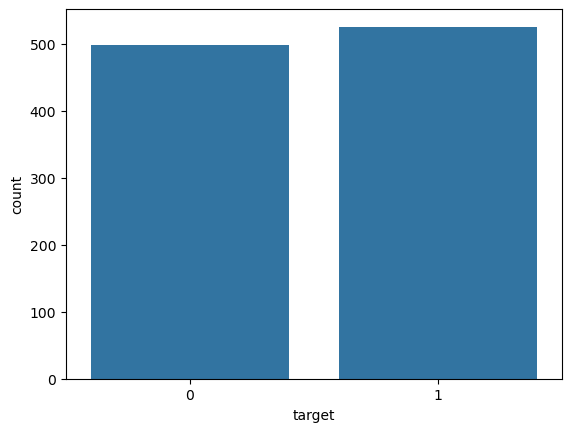

In [6]:
import seaborn as sns
sns.countplot(x='target', data=df)  


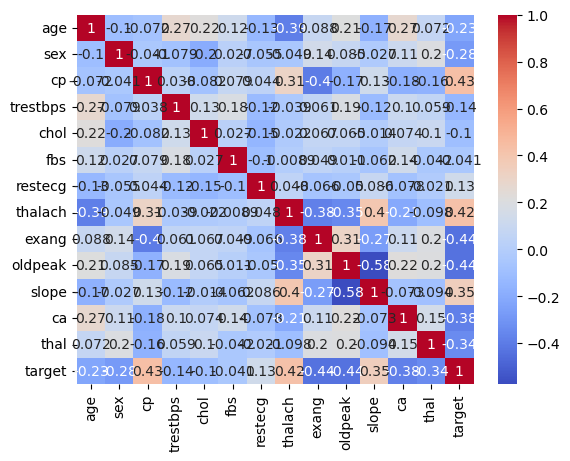

In [7]:
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [8]:

X = df.drop('target', axis=1) 
y = df['target']              


In [9]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)


c:\Users\E N V Y\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.970873786407767
F1 Score: 0.9852216748768473


In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100], 'max_depth': [5, 10]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10], 'n_estimators': [50, 100]})

In [14]:
print("Best Parameters:", grid.best_params_)
print("Best Score (CV Accuracy):", grid.best_score_)


Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Best Score (CV Accuracy): 0.9817073170731707


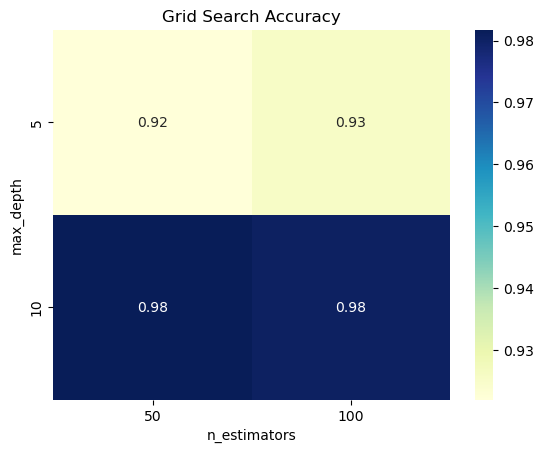

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
results = pd.DataFrame(grid.cv_results_)
pivot_table = results.pivot_table(values='mean_test_score',
                                   index='param_max_depth',
                                   columns='param_n_estimators')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title("Grid Search Accuracy")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()


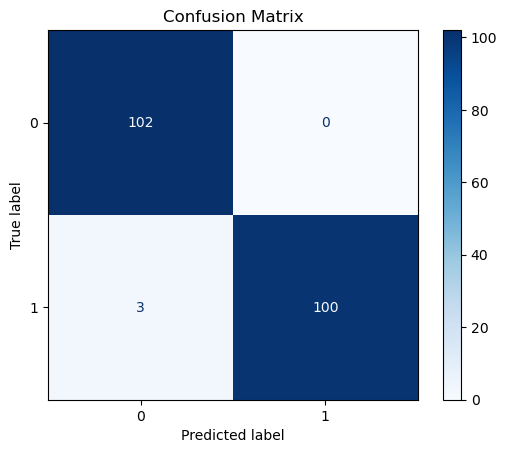

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


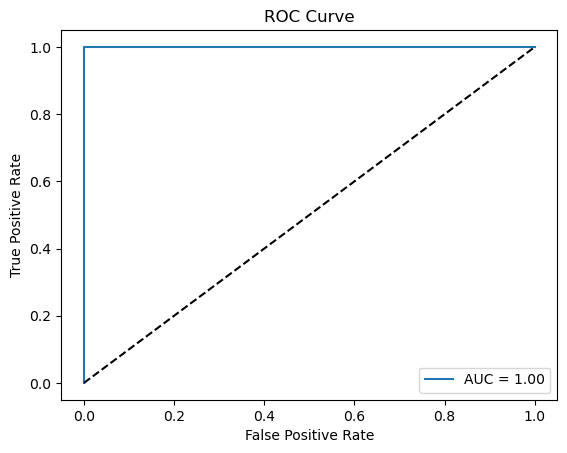

In [17]:
from sklearn.metrics import roc_curve, auc
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
